In [1]:
import sys, os
sys.path.insert(1, '/psi/home/li_s1/bdd100k/')

from bdd100k.label import label
from bdd100k.label.label import drivables, labels, lane_categories

In [2]:
import concurrent.futures

import numpy as np
from scalabel.label.typing import Label
from scalabel.label.io import load

In [3]:
PATH_model = '/psi/home/li_s1/data/Season/pretrained'
PATH_data = '/psi/home/li_s1/data/Season/bdd100k-data/'
PATH_name = '/psi/home/li_s1/DeepLearning2021/dataset/names'

train_path = os.path.join(PATH_data, "images/100k/train")
val_path = os.path.join(PATH_data, "images/100k/val")
test_path = os.path.join(PATH_data, "images/100k/test")
data_set_paths = [train_path, val_path, test_path]
data_set_paths = [os.path.normpath(path) for path in data_set_paths]

train_set_names = os.path.join(PATH_name, "train.txt")
val_set_names = os.path.join(PATH_name, "val.txt")
test_set_names = os.path.join(PATH_name, "test.txt")
data_set_images_paths = [train_set_names, val_set_names, test_set_names]
data_set_images_paths = [os.path.normpath(path) for path in data_set_images_paths]

label_train_path = os.path.join(PATH_data, "labels/bdd100k_labels_images_train.json")
label_val_path = os.path.join(PATH_data, "labels/bdd100k_labels_images_val.json")

In [ ]:
dataset = load(label_val_path, 2)

In [18]:
dataset

[Frame(name='b1c66a42-6f7d68ca.jpg', url=None, video_name=None, intrinsics=None, extrinsics=None, attributes={'weather': 'overcast', 'scene': 'city street', 'timeofday': 'daytime'}, timestamp=10000, frame_index=None, size=None, labels=[Label(id='0', index=None, manual_shape=True, manual_attributes=True, score=None, attributes={'occluded': False, 'truncated': False, 'traffic_light_color': 'none'}, category='traffic sign', box_2d=None, box_3d=None, poly_2d=None), Label(id='1', index=None, manual_shape=True, manual_attributes=True, score=None, attributes={'occluded': False, 'truncated': False, 'traffic_light_color': 'none'}, category='traffic sign', box_2d=None, box_3d=None, poly_2d=None), Label(id='2', index=None, manual_shape=True, manual_attributes=True, score=None, attributes={'occluded': False, 'truncated': False, 'traffic_light_color': 'none'}, category='traffic sign', box_2d=None, box_3d=None, poly_2d=None), Label(id='3', index=None, manual_shape=True, manual_attributes=True, score

In [19]:
len(dataset)

10000

# Visualize

In [7]:
import matplotlib.pyplot as plt
#%matplotlib inline

In [8]:
from PIL import Image
import numpy as np
from typing import List, Set, Dict, Tuple, Optional, Union
import os


# train_semantic_maps = os.path.join(PATH, "labels/sem_seg/colormaps/train")
# val_semantic_maps = os.path.join(PATH, "labels/sem_seg/colormaps/val")
# semantic_maps_paths = [train_semantic_maps, val_semantic_maps]
# semantic_maps_paths = [os.path.normpath(path) for path in semantic_maps_paths]

def load_image(image_name: str, data_set: List[str]) -> np.ndarray:
    return load_image_file(os.path.join(data_set_paths[data_set], image_name))

def load_semantic_map(image_name: str, data_set: List[str]) -> np.ndarray:
    #print("try to load: ", os.path.join(semantic_maps_paths[data_set], image_name))
    return load_image_file(os.path.join(semantic_maps_paths[data_set], image_name[:-4]+".png"))

def load_image_file(path: Union[str]) -> np.ndarray:
    im_frame = Image.open(path).convert("RGB")
    np_frame = np.array(im_frame)
    return np_frame
    
def load_list_image_names(path: str) -> List[str]:
    """
    reads predefined set of image names for train/val/test and returns list of it
    """
    with open(path) as f:
        lines = f.read().splitlines()
        return lines
    
def load_set_image_names(path: str) -> Set[str]:
    """
    reads predefined set of image names for train/val/test and returns set of it
    """
    return set(load_list_image_names(path))

  0%|          | 13/10000 [00:00<01:22, 121.65it/s]

0 overcast 1
(720, 1280, 3)
1 overcast 1
(720, 1280, 3)
2 overcast 1
(720, 1280, 3)
3 overcast 1
(720, 1280, 3)


  1%|          | 94/10000 [00:00<00:38, 257.86it/s]


4 overcast 1
(720, 1280, 3)
5 overcast 1
(720, 1280, 3)
6 overcast 1
(720, 1280, 3)
7 overcast 1
(720, 1280, 3)
8 overcast 1
(720, 1280, 3)


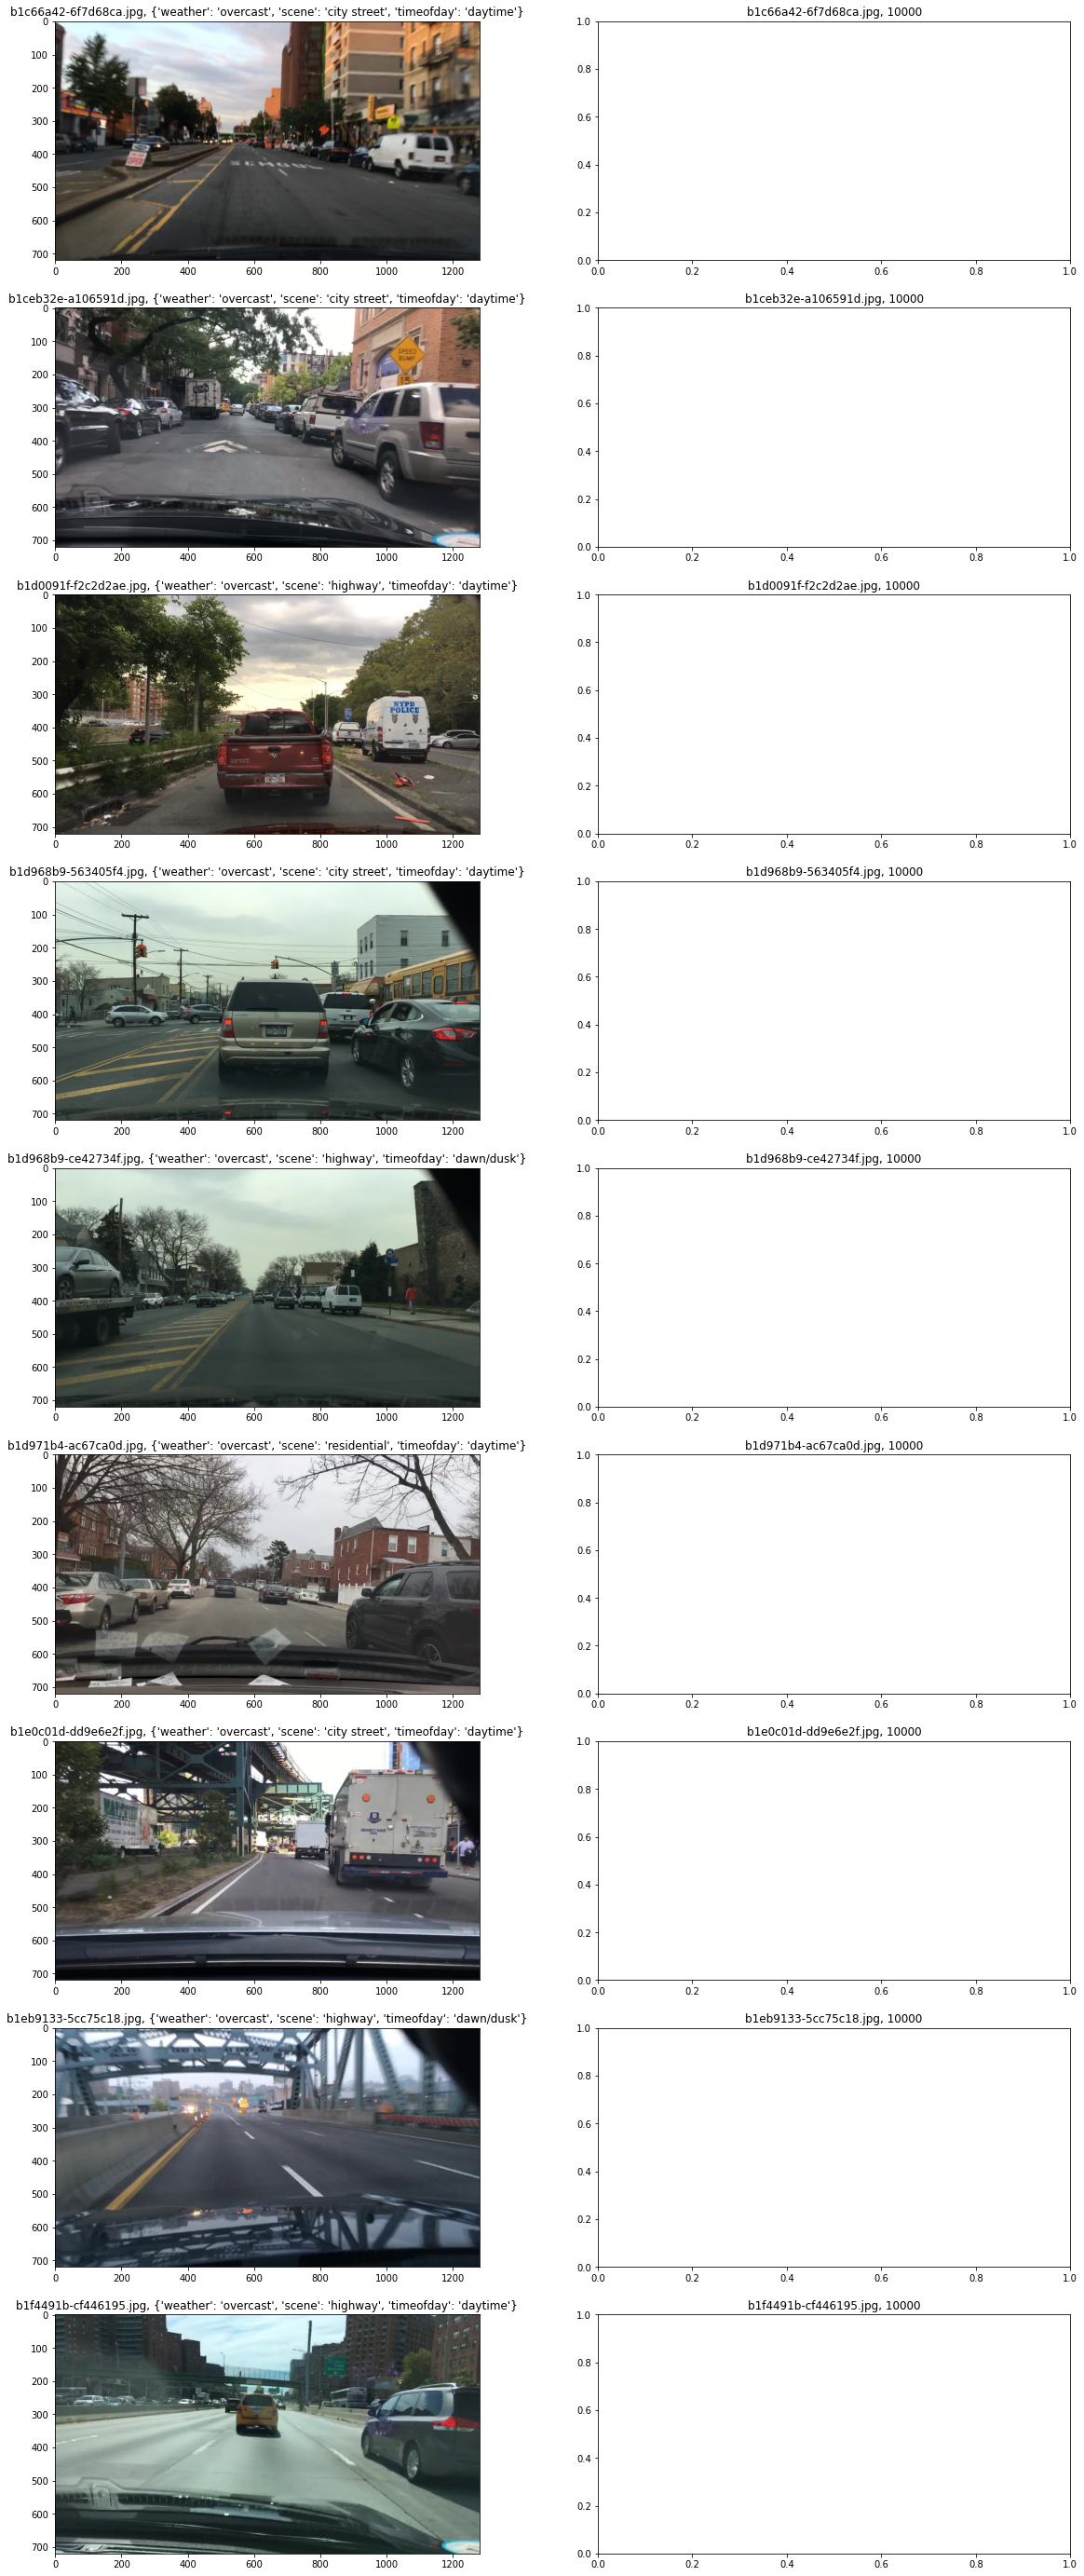

In [20]:
#print(type(dataset), type(dataset.frames), type(dataset.frames[0]))
from tqdm import tqdm
plt.rcParams['figure.figsize'] = [20, 50]
fig, axs = plt.subplots(9,2)

count = 0
for ind, frame in enumerate(tqdm(dataset)):
    #print("check if", frame.name[:-4], " exists")
    if frame.attributes["weather"] != "overcast":
        continue
    if(frame.name[:-4] in image_split_sets[0]):
        d_set = 0;
    elif (frame.name[:-4] in image_split_sets[1]):
        d_set = 1
    else:
        d_set = 2
        continue
    if(count >= 9):
        break
    
    try:
        print(count, frame.attributes['weather'], d_set)
        image = load_image(frame.name, d_set)
    except FileNotFoundError as e:
        print(type(e))
        print(f"couldnt read image {frame.name}")
        continue
        
    #read semantic map
#     try:
#         seg_map = load_semantic_map(frame.name, d_set)
#     except FileNotFoundError as e:
#         print(e)
#         print("couldnt read semantic map")
#         continue    
    
    print(image.shape)
    axs[count][0].set_title(f"{frame.name}, {frame.attributes}")
    axs[count][1].set_title(f"{frame.name}, {frame.timestamp}")
    axs[count][0].imshow(image)
    #axs[count][1].imshow(seg_map)
    #print(frame.name)
    #print(frame)
    #print("\n\n")
    count += 1

In [20]:
weather_train = [frame.attributes["weather"] for frame in dataset]

In [24]:
ll = load_list_image_names(train_set_names)
len(ll)

70000

In [26]:
ll_jpg = [n+'.jpg' for n in ll]
ll_jpg[:10]

['0000f77c-6257be58.jpg',
 '0000f77c-62c2a288.jpg',
 '0000f77c-cb820c98.jpg',
 '0001542f-5ce3cf52.jpg',
 '0001542f-7c670be8.jpg',
 '0001542f-ec815219.jpg',
 '0004974f-05e1c285.jpg',
 '00054602-3bf57337.jpg',
 '00067cfb-5443fe39.jpg',
 '00067cfb-5adfaaa7.jpg']

In [27]:
set(df['name']).issubset(set(ll_jpg))

True

In [11]:
import pandas as pd

df = pd.DataFrame(columns=['dataset','name','weather'])
df['name'] = [frame.name for frame in dataset]
df['weather'] = [frame.attributes["weather"] for frame in dataset]
df['dataset'] = 'train'

In [12]:
df.head()

dataset                   name weather
0   train  0000f77c-6257be58.jpg   clear
1   train  0000f77c-62c2a288.jpg   clear
2   train  0000f77c-cb820c98.jpg   clear
3   train  0001542f-5ce3cf52.jpg   clear
4   train  0001542f-7c670be8.jpg   clear

In [13]:
df.shape

(69863, 3)

In [15]:
df_val = pd.read_csv(os.path.join(PATH_name, 'val_name_weather.csv'))

dataset                   name    weather
0     val  b1c66a42-6f7d68ca.jpg   overcast
1     val  b1c81faa-3df17267.jpg      clear
2     val  b1c81faa-c80764c5.jpg      clear
3     val  b1c9c847-3bda4659.jpg  undefined
4     val  b1ca2e5d-84cf9134.jpg      clear

In [22]:
df_both = pd.concat([df, df_val], ignore_index=True)
len(df_both)

79863

In [28]:
df_both.to_csv(os.path.join(PATH_name, 'both_name_weather.csv'), index=False)

In [29]:
np.unique(df_both.weather)

array(['clear', 'foggy', 'overcast', 'partly cloudy', 'rainy', 'snowy',
       'undefined'], dtype=object)

<AxesSubplot:ylabel='Count'>

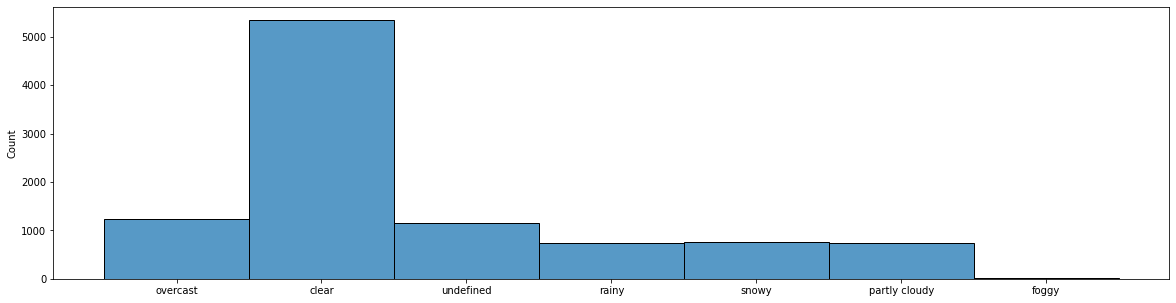

In [19]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [20, 5]
sns.histplot(weather_val)

In [16]:
import torch
from PIL import Image
import numpy as np
from typing import List, Set, Dict, Tuple, Optional, Union
import os
from scalabel.label.io import load
from os import listdir
from os.path import isfile, join

weather_label_to_id = {
    "clear": 0,
    "rainy": 1,
    "undefined": 2,
    "snowy": 3,
    "overcast": 4,
    "partly cloudy": 5,
    "foggy": 6
}


semantic_labels = [
    #       name                     id    trainId   category catId
    #       hasInstances   ignoreInEval   color
    ("unlabeled", 0, 255, "void", 0, False, True, (0, 0, 0)),
    ("dynamic", 1, 255, "void", 0, False, True, (111, 74, 0)),
    ("ego vehicle", 2, 255, "void", 0, False, True, (0, 0, 0)),
    ("ground", 3, 255, "void", 0, False, True, (81, 0, 81)),
    ("static", 4, 255, "void", 0, False, True, (0, 0, 0)),
    ("parking", 5, 255, "flat", 1, False, True, (250, 170, 160)),
    ("rail track", 6, 255, "flat", 1, False, True, (230, 150, 140)),
    ("road", 7, 0, "flat", 1, False, False, (128, 64, 128)),
    ("sidewalk", 8, 1, "flat", 1, False, False, (244, 35, 232)),
    ("bridge", 9, 255, "construction", 2, False, True, (150, 100, 100)),
    ("building", 10, 2, "construction", 2, False, False, (70, 70, 70)),
    ("fence", 11, 4, "construction", 2, False, False, (190, 153, 153)),
    ("garage", 12, 255, "construction", 2, False, True, (180, 100, 180)),
    (
        "guard rail", 13, 255, "construction", 2, False, True, (180, 165, 180)
    ),
    ("tunnel", 14, 255, "construction", 2, False, True, (150, 120, 90)),
    ("wall", 15, 3, "construction", 2, False, False, (102, 102, 156)),
    ("banner", 16, 255, "object", 3, False, True, (250, 170, 100)),
    ("billboard", 17, 255, "object", 3, False, True, (220, 220, 250)),
    ("lane divider", 18, 255, "object", 3, False, True, (255, 165, 0)),
    ("parking sign", 19, 255, "object", 3, False, False, (220, 20, 60)),
    ("pole", 20, 5, "object", 3, False, False, (153, 153, 153)),
    ("polegroup", 21, 255, "object", 3, False, True, (153, 153, 153)),
    ("street light", 22, 255, "object", 3, False, True, (220, 220, 100)),
    ("traffic cone", 23, 255, "object", 3, False, True, (255, 70, 0)),
    (
        "traffic device", 24, 255, "object", 3, False, True, (220, 220, 220)
    ),
    ("traffic light", 25, 6, "object", 3, False, False, (250, 170, 30)),
    ("traffic sign", 26, 7, "object", 3, False, False, (220, 220, 0)),
    (
        "traffic sign frame",
        27,
        255,
        "object",
        3,
        False,
        True,
        (250, 170, 250),
    ),
    ("terrain", 28, 9, "nature", 4, False, False, (152, 251, 152)),
    ("vegetation", 29, 8, "nature", 4, False, False, (107, 142, 35)),
    ("sky", 30, 10, "sky", 5, False, False, (70, 130, 180)),
    ("person", 31, 11, "human", 6, True, False, (220, 20, 60)),
    ("rider", 32, 12, "human", 6, True, False, (255, 0, 0)),
    ("bicycle", 33, 18, "vehicle", 7, True, False, (119, 11, 32)),
    ("bus", 34, 15, "vehicle", 7, True, False, (0, 60, 100)),
    ("car", 35, 13, "vehicle", 7, True, False, (0, 0, 142)),
    ("caravan", 36, 255, "vehicle", 7, True, True, (0, 0, 90)),
    ("motorcycle", 37, 17, "vehicle", 7, True, False, (0, 0, 230)),
    ("trailer", 38, 255, "vehicle", 7, True, True, (0, 0, 110)),
    ("train", 39, 16, "vehicle", 7, True, False, (0, 80, 100)),
    ("truck", 40, 14, "vehicle", 7, True, False, (0, 0, 70)),
]


class Bdd100kDataset(torch.utils.data.Dataset):
    'Characterizes a dataset for PyTorch'
    def __init__(self, list_IDs: List[str], image_dataset_path: str, labels_path: str, keep_in_memory: bool = False):
        """
        Creates a Bdd100k dataset. One dataset should be created for train, test, validation.

        Keyword arguments:
            list_IDs: List[str] -- a list of strings associated with the dataset. The dataset will read all files which are specified by the list_IDs.
            image_dataset_path: str -- the path to the dataset
            labels_path: str -- the path to the labels .json
            keep_in_memory -- whether the whole dataset should be read into the memory or read from disk whenever __getitem__ is called.
        """
        self.image_dataset_path = image_dataset_path

        # this function takes up to 18GB of memory temporarily
        dataset = load(labels_path, 2)

        self.weather_labels = {}
        self.length = 0
        
        # all files in the images_dataset_path
        all_available_images = [f for f in listdir(image_dataset_path) if isfile(join(image_dataset_path, f))]
        available_ids = []
        def add_to_labels(frame):
            if (frame.name[:-4] in list_IDs and frame.name in all_available_images):
                self.weather_labels[frame.name[:-4]] = weather_label_to_id[frame.attributes["weather"]]
                self.length += 1
                available_ids.append(frame.name[:-4])                
        
        
        # go through all of datasets ids and check for their existence in the image_dataset_path
        # if they are in the path and in our list_IDs then we can add the image to self
        # [add_to_labels(frame) for frame in dataset.frames]
        list(map(add_to_labels, dataset.frames))
        print(len(dataset.frames), len(all_available_images), len(available_ids))
        
        self.list_IDs = available_ids
        if self.length != len(self.list_IDs):
            print(f"The length of the dataset ({self.length}) does not match the number of IDs ({len(self.list_IDs)}) provided. Continueing anyways")
        
        self.keep_in_memory = keep_in_memory
        if(keep_in_memory):
            self.images = []
            # load all images into
            for id in self.list_IDs:
                rgb_image = torch.tensor(self.load_image(id))

                # include more data in this tupel if needed
                datum = (rgb_image)
                self.data.append(datum)
                
        
           
    def load_image(self, image_name: str) -> np.ndarray:
        return self.load_rgb_image_file(os.path.join(self.image_dataset_path, image_name+".jpg"))

    def load_semantic_map(self, image_name: str, data_set: List[str]) -> np.ndarray:
        return self.load_image_file(os.path.join(semantic_maps_paths[data_set], image_name+".png"))

    def load_rgb_image_file(self, path: Union[str]) -> np.ndarray:
        im_frame = Image.open(path).convert("RGB")
        np_frame = np.array(im_frame)
        return np_frame
    
    def semantic_rgb_to_grayscale_map(self, image):
        semantic_map = torch.zeros([image.shape[0], image.shape[1]], dtype=torch.float32)
        for x in range(image.shape[1]):
            for y in range(image.shape[0]):
                semantic_map[y, x] = self.rgb_to_id(image[y,x])
        return semantic_map
    
    def rgb_to_id(self, rgb_pixel):
        for label in semantic_labels:
            if rgb_pixel == label[7]:
                return label[1]
                

    def __len__(self):
        'Denotes the total number of samples'
        return self.length

    def __getitem__(self, index):
        """Generates one sample of data
        a sample is a tuple (X, y)
        - X a torch.tensor with shape (height, width, rgb_channels + semantic_channel = 4)
        - y the id of the weather
        """
        if (self.keep_in_memory):
            image_rgb = self.images[index][0]
            #TODO fill with semantic image
            image_semantic = torch.zeros(image_rgb.shape[0],image_rgb.shape[1],1)
        else:
            print(self.load_image(self.list_IDs[index]).shape)
            image_rgb = torch.from_numpy(self.load_image(self.list_IDs[index]))
            # load semantic image from the disk
            image_semantic = torch.zeros(image_rgb.shape[0],image_rgb.shape[1],1)
        
        y = self.weather_labels[self.list_IDs[index]]
        return torch.cat([image_rgb, image_semantic], dim=2), y
    
    

In [17]:
train_dataset = Bdd100kDataset(load_list_image_names(val_set_names), val_path, label_val_path)

10000 10000 10000


In [18]:
train_dataset.__len__()

10000

In [19]:
image = train_dataset.__getitem__(0)[0].shape
image

(720, 1280, 3)


torch.Size([720, 1280, 4])